In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Import the csv file
itc_df = pd.read_csv('Data/ITC.csv')
itc_df['Date'] = pd.to_datetime(itc_df['Date'])
itc_df = itc_df.sort_values('Date')
itc_df.set_index('Date', inplace=True)
itc_df = itc_df[itc_df["Series"] == "EQ"]
itc_df.head(5)

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,ITC,EQ,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57
2017-05-16,ITC,EQ,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15
2017-05-17,ITC,EQ,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40
2017-05-18,ITC,EQ,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58
2017-05-19,ITC,EQ,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57


In [3]:
#calculating the mean daily return and daily standard deviation of returns.
itc_df['Daily Return'] = (itc_df['Close Price']).pct_change() 
itc_df.dropna(inplace = True)
print("Mean Daily Return", itc_df['Daily Return'].mean())

itc_df['Daily Standard Deviation'] = (itc_df['Close Price']).pct_change() 
itc_df.dropna(inplace = True)
print("Daily Standard Deviation: ", itc_df['Daily Standard Deviation'].std())

#Annualising them to get mean expected annual return and volatility.
annual_mean =  itc_df['Daily Return'].mean() * 252
print("Annual Mean: "+ str(annual_mean))

import math
annual_stdev = itc_df['Daily Standard Deviation'].std() * math.sqrt(252)
print("Annual Standard Deviation: "+ str(annual_stdev))

Mean Daily Return 0.00018225444638345434
Daily Standard Deviation:  0.014151348486305714
Annual Mean: 0.03588629072374186
Annual Standard Deviation: 0.2246456928658515


In [4]:
#Building a portfolio by choosing any 5 stocks,of different sectors. 

df = {}
daily_returns = {}

stocks = {'hindu_df': 'Data/HINDUNILVR.csv', 
          'lt_df':'Data/LT.csv', 
          'mm_df':'Data/M&M.csv', 
          'titan_df':'Data/TITAN.csv', 
          'reliance':'Data/RELIANCE.csv'}

for i, csv in stocks.items():
    df[i] = pd.read_csv(csv)    
    df[i].Date = pd.to_datetime(df[i]['Date'])
    df[i] = df[i].set_index('Date')
    df[i] = df[i][df[i]["Series"] == "EQ"]  
    
    df[i]["DailyReturn"] = df[i]["Close Price"].pct_change()
    df[i].dropna(inplace = True)
    
    daily_returns[i] = [df[i].DailyReturn.std(), df[i].DailyReturn.mean()]
    print( 'Annual Returns for', i ,[daily_returns[i][0]*(252**0.5), daily_returns[i][1]*252])

Annual Returns for hindu_df [0.19404108405647758, 0.2993780392355356]
Annual Returns for lt_df [0.3143228200218012, -0.08590369108501707]
Annual Returns for mm_df [0.44056952429009344, -0.27240098958679937]
Annual Returns for titan_df [0.3248356467094942, 0.49159268726041294]
Annual Returns for reliance [0.43923319663458965, 0.08731772431270261]


In [5]:
#Assuming that all 5 have the same weightage, i.e. 20% and calculating the annual returns and volatility of the entire portfolio 

S = {}
M = []
for stock in df.keys():
    S[stock] = df[stock].DailyReturn
    M.append(S[stock].mean())
    
S = pd.DataFrame(data = S) 
C = np.cov(S.values.reshape((S.shape[1], S.shape[0]))) 
M = np.array(M).reshape((1, 5)) 
W = np.ones((5, 1))*(0.20) 

volatility = np.sqrt(np.matmul(np.matmul(W.T, C), W)) *(252**0.5)
Return = np.matmul(M, W) *(252)

print('Returns = ', Return[0][0])
print("Volatility = ", volatility[0][0])

Returns =  0.10399675402736695
Volatility =  0.15385905693395294


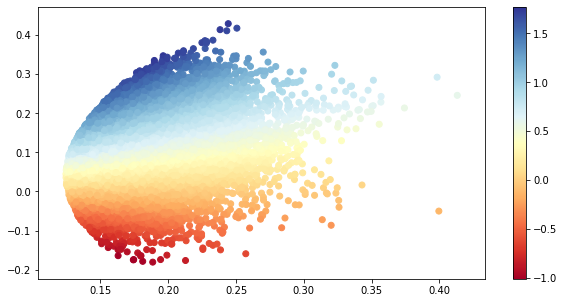

In [6]:
#scatter plot for differing weights of the individual stocks in the portfolio
#obtaining the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.
num_portfolios = 25000

results = np.zeros((3,num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(5)
    weights /= np.sum(weights)
 
    portfolio_return = np.matmul(M, weights) *252
    portfolio_std_dev = np.sqrt(np.matmul(np.matmul(weights.T, C), weights)) *(252**0.5) 
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    
    #store Sharpe Ratio (return / volatility) 
    results[2,i] = results[0,i] / results[1,i]  
    
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

plt.subplots(figsize=(10, 5))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()

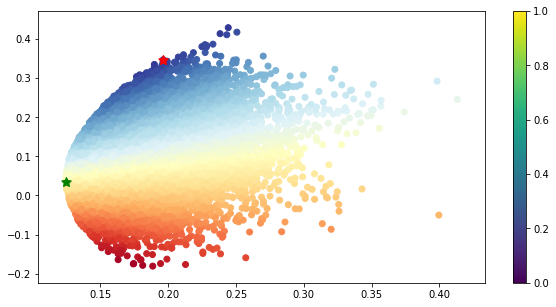

In [8]:
#Marking the 2 portfolios where -
#Portfolio 1 - The Sharpe ratio is the highest
#Portfolio 2 - The volatility is the lowest.

max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
plt.subplots(figsize=(10, 5))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=100)
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=100)
plt.colorbar()